In [119]:
# latest simulation (04/19/17) + include power calculation

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import linalg as LA

import pickle

import transform
import statistics
import simulation
import dsfdr

%matplotlib notebook
import matplotlib.pyplot as plt
import pylab

%load_ext autoreload
%autoreload 2

## preliminary simulation (no need power calculation)

In [2]:
np.random.seed(31)

ss0 = [5, 10, 15, 20, 30, 40, 50, 100]
B = 100

otu_bh0 = []
otu_fbh0 = []
otu_ds0 = []

pval_bh0 = []
pval_fbh0 = []
pval_ds0 = []

for j in ss0:
    sig_bh0 = []
    sig_fbh0 = []
    sig_ds0 = []
    for i in range(B):
        data0, labels0 = simulation.simulatedat2(numsamples = j, numdiff=0, numc =100, numd=0)
        rej_bh0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='bhfdr')
        rej_fbh0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='filterBH')
        rej_ds0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='dsfdr')
        
        r_bh0 = np.sum(rej_bh0[0])
        sig_bh0.append(r_bh0)
        pval_bh0.append(rej_bh0[2])
        
        r_fbh0 = np.sum(rej_fbh0[0])
        sig_fbh0.append(r_fbh0)
        pval_fbh0.append(rej_fbh0[2])

        r_ds0 = np.sum(rej_ds0[0])
        sig_ds0.append(r_ds0)
        pval_ds0.append(rej_ds0[2])

    otu_bh0.append(np.mean(sig_bh0))
    otu_fbh0.append(np.mean(sig_fbh0))
    otu_ds0.append(np.mean(sig_ds0))

<IPython.core.display.Javascript object>


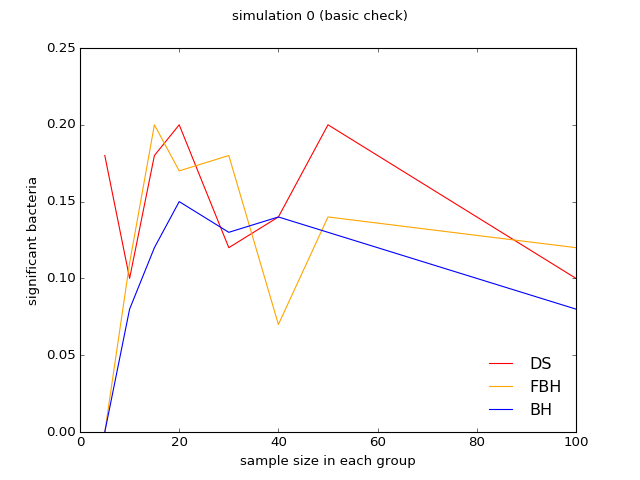

In [3]:
plt.figure()
plt.plot(ss0, otu_ds0, color = 'red', label = 'DS')
plt.plot(ss0, otu_fbh0, color = 'orange', label = 'FBH')
plt.plot(ss0, otu_bh0, color = 'blue', label = 'BH')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation 0 (basic check)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')

1.96344655345


<IPython.core.display.Javascript object>


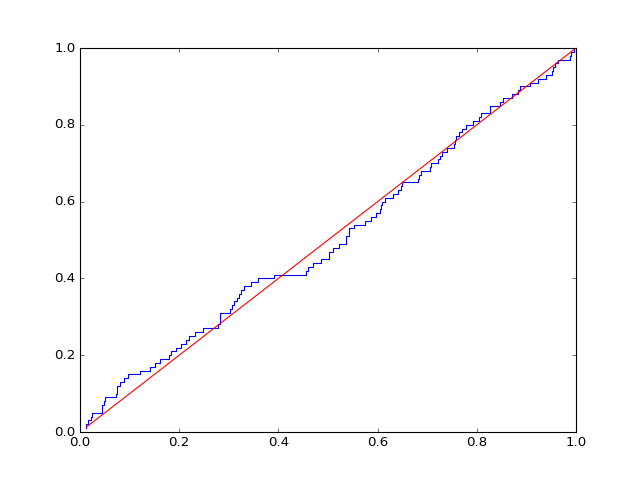

In [4]:
sample = pval_ds0[698]
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)
print(LA.norm(x - y, 1))

plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')

In [5]:
with open("../results/simulation0_v4.pkl", "wb") as f:
    pickle.dump((ss0, otu_bh0, otu_fbh0, otu_ds0, 
                 pval_bh0, pval_fbh0, pval_ds0), f)

## simulation 1

In [2]:
# effect size: mu_h in U(5, 6) mu_s in U(3, 4)
np.random.seed(31)

B = 100
ss1 = [10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100]


otu_bh1 = []
otu_fbh1 = []
otu_ds1 = []

pval_bh1 = []
pval_fbh1 = []
pval_ds1 = []

FDR_bh1 = []
FDR_fbh1 = []
FDR_ds1 = []

PWR_bh1 = []
PWR_fbh1 = []
PWR_ds1 = []

for j in ss1:
    fdr_bh1 = []
    fdr_fbh1 = []
    fdr_ds1 = []

    sig_bh1 = []
    sig_fbh1 = []
    sig_ds1 = []
    
    pwr_bh1 = []
    pwr_fbh1 = []
    pwr_ds1 = []
    for i in range(B):
        data1,labels1 = simulation.simulatedat2(numsamples = j, sigma=2, numdiff=100, numc =100, numd=800)
        rej_bh1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='bhfdr')
        rej_fbh1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='filterBH')
        rej_ds1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='dsfdr')
        
        v_bh1 = np.sum(np.where(rej_bh1[0])[0]>=100)
        r_bh1 = np.sum(rej_bh1[0])
        sig_bh1.append(r_bh1)
        fdr_bh1.append(v_bh1/r_bh1)
        pval_bh1.append(rej_bh1[2])
        pwr_bh1.append(np.sum(np.where(rej_bh1[0])[0]<100)/100)
        
        v_fbh1 = np.sum(np.where(rej_fbh1[0])[0]>=100)
        r_fbh1 = np.sum(rej_fbh1[0])
        sig_fbh1.append(r_fbh1)
        fdr_fbh1.append(v_fbh1/r_fbh1)
        pval_fbh1.append(rej_fbh1[2])
        pwr_fbh1.append(np.sum(np.where(rej_fbh1[0])[0]<100)/100)
        
        v_ds1 = np.sum(np.where(rej_ds1[0])[0]>=100)
        r_ds1 = np.sum(rej_ds1[0])
        sig_ds1.append(r_ds1)
        fdr_ds1.append(v_ds1/r_ds1)
        pval_ds1.append(rej_ds1[2])
        pwr_ds1.append(np.sum(np.where(rej_ds1[0])[0]<100)/100)

    print('otu...: %s' %(j))   
    otu_bh1.append(np.mean(sig_bh1))
    otu_fbh1.append(np.mean(sig_fbh1))
    otu_ds1.append(np.mean(sig_ds1))
    
    print('FDR...: %s' %(j))
    FDR_bh1.append(np.nanmean(fdr_bh1))
    FDR_fbh1.append(np.nanmean(fdr_fbh1))
    FDR_ds1.append(np.nanmean(fdr_ds1))
    
    print('PWR...: %s' %(j))
    PWR_bh1.append(np.nanmean(pwr_bh1))
    PWR_fbh1.append(np.nanmean(pwr_fbh1))
    PWR_ds1.append(np.nanmean(pwr_ds1))

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in long_scalars


otu...: 10
FDR...: 10
PWR...: 10
otu...: 15
FDR...: 15
PWR...: 15
otu...: 20
FDR...: 20
PWR...: 20
otu...: 25
FDR...: 25
PWR...: 25
otu...: 30
FDR...: 30
PWR...: 30
otu...: 35
FDR...: 35
PWR...: 35
otu...: 40
FDR...: 40
PWR...: 40
otu...: 50
FDR...: 50
PWR...: 50
otu...: 60
FDR...: 60
PWR...: 60
otu...: 70
FDR...: 70
PWR...: 70
otu...: 80
FDR...: 80
PWR...: 80
otu...: 90
FDR...: 90
PWR...: 90
otu...: 100
FDR...: 100
PWR...: 100


<IPython.core.display.Javascript object>


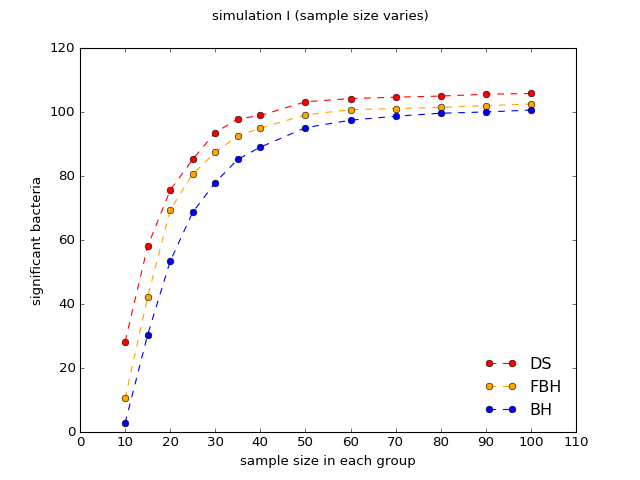

([<matplotlib.axis.XTick at 0x110ca13c8>,
 <a list of 12 Text xticklabel objects>)

In [3]:
plt.figure()
plt.plot(ss1, otu_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(ss1, otu_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, otu_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')
plt.xticks(np.arange(0,120,10))

<IPython.core.display.Javascript object>


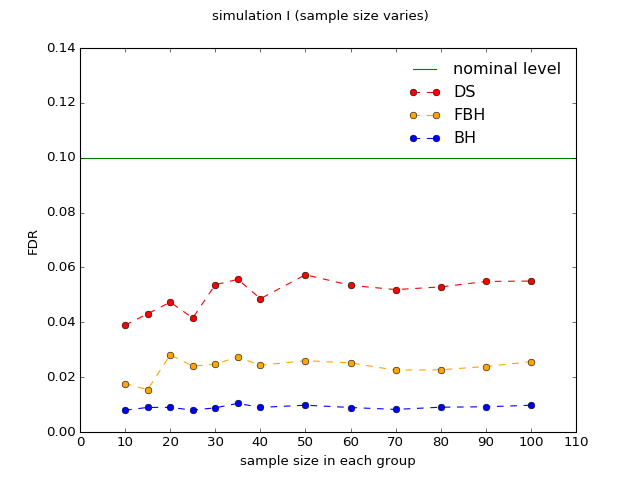

([<matplotlib.axis.YTick at 0x10be2c048>,
 <a list of 8 Text yticklabel objects>)

In [4]:
plt.figure()
plt.axhline(0.1, color = 'green', label = 'nominal level')
plt.plot(ss1, FDR_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(ss1, FDR_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, FDR_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc = 'upper right', frameon=False)
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('FDR')
plt.xticks(np.arange(0,120,10))
plt.yticks(np.arange(0,0.14, 0.02))

<IPython.core.display.Javascript object>


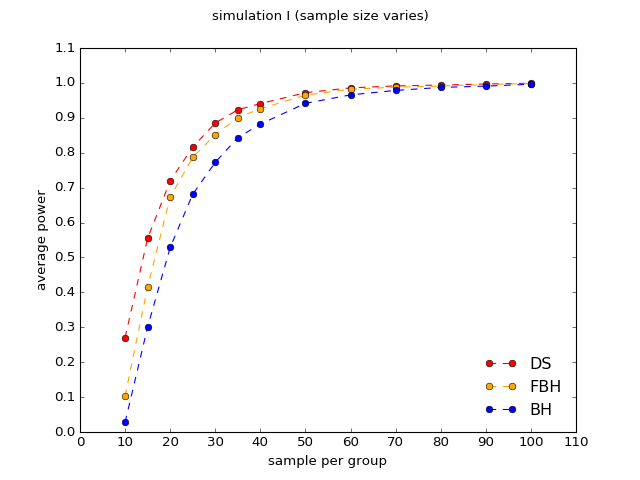

([<matplotlib.axis.YTick at 0x1114fcfd0>,
 <a list of 12 Text yticklabel objects>)

In [5]:
plt.figure()
plt.plot(ss1, PWR_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(ss1, PWR_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, PWR_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample per group')
plt.ylabel('average power')
plt.xticks(np.arange(0,120,10))
plt.yticks(np.arange(0, 1.2, 0.1))

In [8]:
with open("../results/simulation1_v6.pkl", "wb") as f:
    pickle.dump((ss1, otu_bh1, otu_fbh1, otu_ds1, 
                 FDR_bh1, FDR_fbh1, FDR_ds1, 
                 pval_bh1, pval_fbh1, pval_ds1,
                PWR_bh1, PWR_fbh1, PWR_ds1), f)

## simulation 2

In [9]:
np.random.seed(31)

B = 100
d = [500, 1000, 2000, 4000, 6000, 8000, 10000]

otu_bh2 = []
otu_fbh2 = []
otu_ds2 = []

FDR_bh2 = []
FDR_fbh2 = []
FDR_ds2 = []

pval_bh2 = []
pval_fbh2 = []
pval_ds2 = []

PWR_bh2 = []
PWR_fbh2 = []
PWR_ds2 = []

for j in d:
    fdr_bh2 = []
    fdr_fbh2 = []
    fdr_ds2 = []

    sig_bh2 = []
    sig_fbh2 = []
    sig_ds2 = []
    
    pwr_bh2 = []
    pwr_fbh2 = []
    pwr_ds2 = []
    for i in range(B):
        data2,labels2 = simulation.simulatedat2(numsamples = 50, numdiff=100, numc =100, numd=j)
        rej_bh2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='bhfdr')
        rej_fbh2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='filterBH')
        rej_ds2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='dsfdr')
        
        v_bh2 = np.sum(np.where(rej_bh2[0])[0]>=100)
        r_bh2 = np.sum(rej_bh2[0])
        sig_bh2.append(r_bh2)
        fdr_bh2.append(v_bh2/r_bh2)
        pval_bh2.append(rej_bh2[2])
        pwr_bh2.append(np.sum(np.where(rej_bh2[0])[0]<100)/100)
        
        v_fbh2 = np.sum(np.where(rej_fbh2[0])[0]>=100)
        r_fbh2 = np.sum(rej_fbh2[0])
        sig_fbh2.append(r_fbh2)
        fdr_fbh2.append(v_fbh2/r_fbh2)
        pval_fbh2.append(rej_fbh2[2])
        pwr_fbh2.append(np.sum(np.where(rej_fbh2[0])[0]<100)/100)
        
        v_ds2 = np.sum(np.where(rej_ds2[0])[0]>=100)
        r_ds2 = np.sum(rej_ds2[0])
        sig_ds2.append(r_ds2)
        fdr_ds2.append(v_ds2/r_ds2)
        pval_ds2.append(rej_ds2[2])
        pwr_ds2.append(np.sum(np.where(rej_ds2[0])[0]<100)/100)
    
    print('otu...: %s' %(j)) 
    otu_bh2.append(np.mean(sig_bh2))
    otu_fbh2.append(np.mean(sig_fbh2))
    otu_ds2.append(np.mean(sig_ds2))
    
    print('FDR...: %s' %(j)) 
    FDR_bh2.append(np.nanmean(fdr_bh2))
    FDR_fbh2.append(np.nanmean(fdr_fbh2))
    FDR_ds2.append(np.nanmean(fdr_ds2))
    
    print('PWR...: %s' %(j))
    PWR_bh2.append(np.nanmean(pwr_bh2))
    PWR_fbh2.append(np.nanmean(pwr_fbh2))
    PWR_ds2.append(np.nanmean(pwr_ds2))


otu...: 500
FDR...: 500
PWR...: 500
otu...: 1000
FDR...: 1000
PWR...: 1000
otu...: 2000
FDR...: 2000
PWR...: 2000
otu...: 4000
FDR...: 4000
PWR...: 4000
otu...: 6000
FDR...: 6000
PWR...: 6000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in long_scalars


otu...: 8000
FDR...: 8000
PWR...: 8000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in long_scalars


otu...: 10000
FDR...: 10000
PWR...: 10000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


<IPython.core.display.Javascript object>


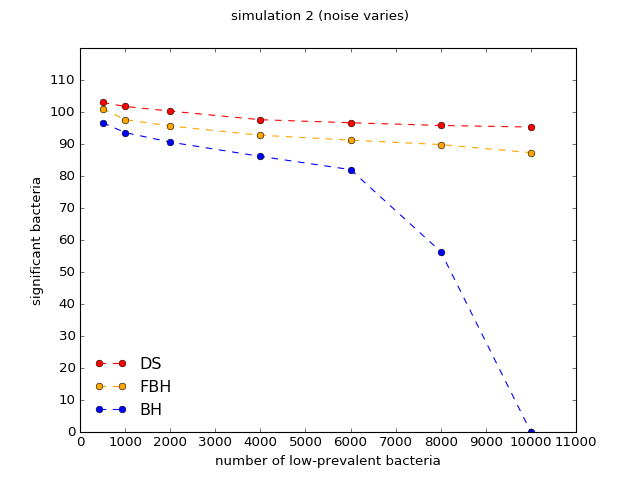

([<matplotlib.axis.YTick at 0x11577d128>,
 <a list of 12 Text yticklabel objects>)

In [10]:
plt.figure()
plt.plot(d, otu_ds2, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(d, otu_fbh2, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(d, otu_bh2, linestyle='--', marker='o', color = 'blue', label = 'BH')

pylab.legend(loc ='lower left', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('significant bacteria')
#pylab.xlim([0, 11000])
plt.xticks(np.arange(0, 12000, 1000))
plt.yticks(np.arange(0, 120, 10))

<IPython.core.display.Javascript object>


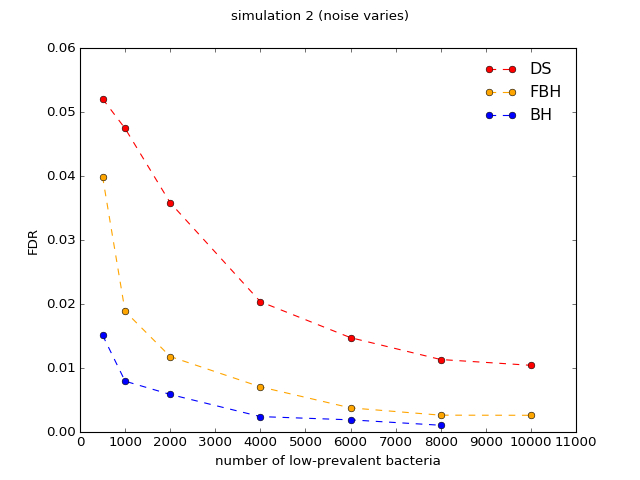

(0, 0.06)

In [11]:
plt.figure()
plt.plot(d, FDR_ds2, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(d, FDR_fbh2, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(d, FDR_bh2, linestyle='--', marker='o', color = 'blue', label = 'BH')

pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('FDR')
#pylab.xlim([0, 12000])
plt.xticks(np.arange(0, 12000, 1000))
pylab.ylim([0, 0.06])

<IPython.core.display.Javascript object>


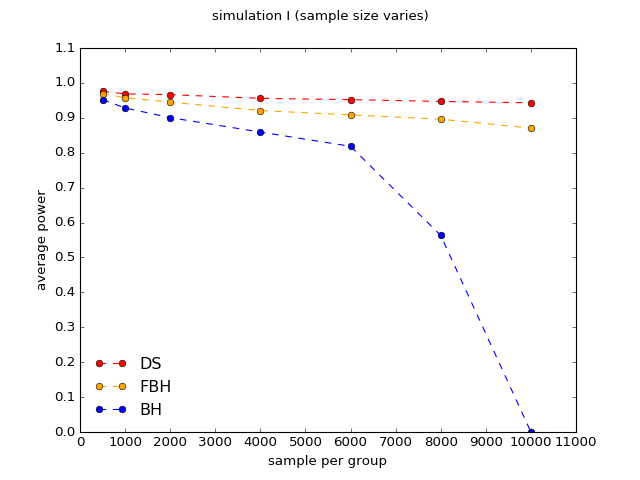

([<matplotlib.axis.YTick at 0x11539ac18>,
 <a list of 12 Text yticklabel objects>)

In [12]:
plt.figure()
plt.plot(d, PWR_ds2, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(d, PWR_fbh2, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(d, PWR_bh2, linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc ='lower left', frameon=False)
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample per group')
plt.ylabel('average power')
plt.xticks(np.arange(0, 12000, 1000))
plt.yticks(np.arange(0, 1.2, 0.1))

In [13]:
with open("../results/simulation2_v6.pkl", "wb") as f:
    pickle.dump((d, otu_bh2, otu_fbh2, otu_ds2, 
                 FDR_bh2, FDR_fbh2, FDR_ds2, 
                 pval_bh2, pval_fbh2, pval_ds2,
                 PWR_bh2, PWR_fbh2, PWR_ds2), f)